# DATA 601 Project
    Domestic Movie Analysis from 1972-2016 – Have Domestic Films Gotten Worse? 
    
#### By: 
* Brian Englum
* Tyler Snow
* Joel Wheaton
* Kumar Pasupuleti

> **Purpose:**
> * Many movie fans and film critics believe that U.S. domestic movies have deteriorated in quality over time. Classic blockbusters like "The Godfather," "The Terminator," the Star Wars Episodes IV-VI seem to be a thing of the past. Studios and producers appear to be more interested in making animations; plot-absent, visually entertaining films; and never-ending sequels than making truly original, creative films. 
> * Although viewers and critics may feel this way, little research has been done on the topic.
> * The goal of this project is to use statistical analysis and data science tools to explore this topic and come to a conclusion, one way or another.  

In [159]:
# Imports

import pandas as pd
from Movie import Movie
import csv
import numpy
import plotly.express as px

In [228]:
# Create initial DataFrame from movie_data.csv

df = pd.read_csv('movie_data.csv')
df.sample(1)

df[df['Title'] == "Hubie Halloween"]

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Origin


## I: Data Cleaning

## II: Data Visualization

### A. Movie Ratings as a Function of Time (in years)

#### Step 1) Data Cleaning

In [224]:
# A little cleaning:
# Delete below when data cleaning code is added.

def clean_rotten_tom(rtg):
    if type(rtg) is str:
        if '/' in rtg:
            return None
        else: 
            return rtg
    else: 
        return rtg
        

df_clean = df.copy()
df_clean['Rotten Tomatoes'] = df_clean['Rotten Tomatoes'].apply(clean_rotten_tom)
df_clean ['Rotten Tomatoes'] = df_clean['Rotten Tomatoes'].astype(float)
df_clean['Metacritic'] = df_clean['Metacritic'].astype(float)
df_clean['TMDB'] = df_clean['TMDB'].astype(float)

df_clean.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Origin
2277,Memphis Belle,1990.0,"Action, Drama, War",6.9,68.0,59.0,6.7,"30,920",Nominated for 1 BAFTA Award1 win & 4 nominatio...,"$27,441,977",movie,"United Kingdom, Japan, United States"


#### Step 2) Group movie data by year and then use aggregation to find averages per metric per year.

In [187]:
# Group by year and find average ratings per metric per year.

df_group = df_clean.groupby("Year").aggregate({
    'IMDB':'mean',
    'Rotten Tomatoes':'mean',
    'Metacritic':'mean',
    'TMDB':'mean'})

df_group = df_group.reset_index()

#### Step 3) Plot (4) line graphs containing movie ratings per metric as a function of time, in years.

In [ ]:
# Restricts years used from 1973 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

df_group_73_to_23 = df_group[(df_group['Year'] >= 1973.0) & (df_group['Year'] <= 2023.0)]

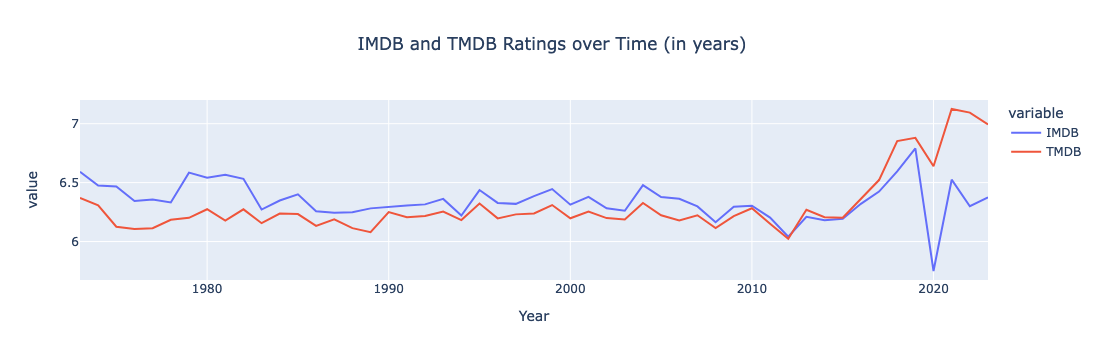

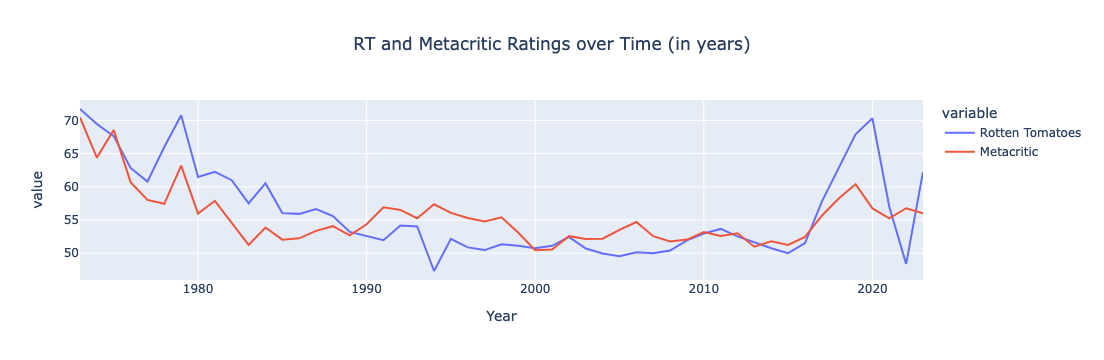

In [208]:
# Plot movie ratings per metric per year.

fig1 = px.line(
    df_group_73_to_23,
    x = 'Year',
    y = ['IMDB','TMDB'],
    title='IMDB and TMDB Ratings over Time (in years)'
)

fig2 = px.line(
    df_group_73_to_23,
    x = 'Year',
    y = ['Rotten Tomatoes','Metacritic'],
    title='RT and Metacritic Ratings over Time (in years)'
)

# fig3 = px.line(
#     df_group_73_to_23,
#     x = 'Year',
#     y = 'Metacritic',
#     title='Metacritic Ratings over Time (in years)'
# )

# fig4 = px.line(
#     df_group_73_to_23,
#     x = 'Year',
#     y = 'TMDB',
#     title='TMDB Ratings over Time (in years)'
# )
fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
#fig3.update_layout(title_x = .5)
#fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
#fig3.show()
#fig4.show()
    